# Data Science - Laboratorio 7
## Miner√≠a de Texto: An√°lisis de redes sociales

---
### Integrantes:
- Diego Alberto Leiva 21752
- Jos√© Pablo Orellana 21970
- - -

## Librerias

In [1]:
# Operaciones con datos
import pandas as pd

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt
import seaborn as sns

## Conjuntos de datos

Se recopilaron aproximadamente 5,000 tweets de la cuenta @traficogt y @BArevalodeLeon hasta el 12 de septiembre de 2024. Estos datos vienen en formato JSON con metadatos que incluyen el ID de usuario, texto del tweet, menciones, retweets, y n√∫mero de favoritos, etc. Estos tweets reflejan las interacciones de los usuarios de la ciudad con relaci√≥n a la situaci√≥n del tr√°fico, o del presidente electo de Guatemala.

### Selecci√≥n

Para este an√°lisis, se ha seleccionado el conjunto de datos proveniente exclusivamente de la cuenta @traficogt, con el objetivo de abordar preguntas clave como: 
- **¬øC√≥mo ha impactado la temporada de lluvias en el tr√°fico de la ciudad?** 
- **¬øCu√°les son las √°reas m√°s afectadas por la congesti√≥n vehicular?**
- **¬øEn qu√© horarios se presentan los mayores atascos seg√∫n los usuarios de la plataforma X (anteriormente Twitter)?**

El tr√°fico es uno de los problemas m√°s persistentes y visibles en la vida diaria de los habitantes de la ciudad. La congesti√≥n vehicular, exacerbada durante la temporada de lluvias, afecta tanto la movilidad como la calidad de vida de millones de personas. Este an√°lisis permitir√° no solo entender c√≥mo las lluvias han complicado a√∫n m√°s el tr√°fico en la ciudad, sino tambi√©n identificar patrones recurrentes en las zonas y horarios de mayor congesti√≥n. Esto podr√≠a ofrecer informaci√≥n √∫til para las autoridades y ciudadanos que buscan mitigar el impacto de estos problemas.

## Carga de Dataset

In [2]:
traficogt_df = pd.read_json('data/traficogt.txt', lines=True, encoding='utf-8')

## Comprensi√≥n Inicial

### Informaci√≥n General del Dataset

In [3]:
def get_DF_info(df):
    """
    Funci√≥n que genera un dataframe con informaci√≥n sobre las columnas de un dataframe dado.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        
    Returns:
        None
    """
    # Crear un dataframe con la informaci√≥n de las columnas
    info = pd.DataFrame({
        'Nombre Columna': df.columns,
        'Tipo de Dato': df.dtypes,
        'Valores Nulos (%)': (df.isnull().sum() * 100 / df.shape[0]).round(2),
        # Si la columna contiene dict o list, mostrar el tipo. Si no, calcular los valores √∫nicos
        'Valores √önicos': df.apply(lambda x: 'dict' if x.apply(lambda y: isinstance(y, dict)).any() else 
                                             ('list' if x.apply(lambda y: isinstance(y, list)).any() else x.nunique()))
    }).reset_index(drop=True)

    # Mostrar la informaci√≥n del DataFrame
    print(f"\nEl DataFrame tiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas (variables)\n")
    display(info)

In [4]:
# Mostrar informaci√≥n del DataFrame de 'traficogt'
print("Informaci√≥n del dataset: traficogt.txt")
get_DF_info(traficogt_df)

Informaci√≥n del dataset: traficogt.txt

El DataFrame tiene 5605 filas (registros) y 32 columnas (variables)



Nombre Columna         Tipo de Dato  Valores Nulos (%) Valores √önicos
0                    id                int64               0.00           5597
1                id_str                int64               0.00           5597
2                   url               object               0.00           5597
3                  date  datetime64[ns, UTC]               0.00           5588
4                  user               object               0.00           dict
5                  lang               object               0.00             24
6            rawContent               object               0.00           5589
7            replyCount                int64               0.00            196
8          retweetCount                int64               0.00            350
9             likeCount                int64               0.00            502
10           quoteCount                int64               0.00            122
11      bookmarkedCount                int64               0.00             75
12       conversationId                int64               0.00           3184
13    conversationIdStr                int64               0.00           3184
14             hashtags               object               0.00           list
15             cashtags               object               0.00           list
16       mentionedUsers               object               0.00           list
17                links               object               0.00           list
18            viewCount              float64               0.07           1844
19       retweetedTweet              float64             100.00              0
20          quotedTweet               object              89.10           dict
21                place               object              99.29           dict
22          coordinates              float64             100.00              0
23     inReplyToTweetId              float64              28.78           2291
24  inReplyToTweetIdStr              float64              28.78           2291
25        inReplyToUser               object              25.94           dict
26               source               object               0.00             18
27            sourceUrl               object               0.00             18
28          sourceLabel               object               0.00             18
29                media               object               0.00           dict
30                 card               object              98.50           dict
31                _type               object               0.00              1

El an√°lisis inicial ha revelado la presencia de estructuras complejas como diccionarios y listas en varias columnas del conjunto de datos. Esto indica que algunos campos contienen datos anidados, los cuales requieren un procesamiento especial para ser adecuadamente analizados. Adem√°s, se ha observado una discrepancia en los tipos de datos; por ejemplo, variables que deber√≠an ser tratadas como cadenas de texto (str) se est√°n manejando como enteros (int).

### Visualizar Dataframe

In [5]:
pd.set_option('display.max_columns', None)
traficogt_df.head()

id               id_str  \
0  1834236045598056867  1834236045598056960   
1  1834029142565658846  1834029142565658880   
2  1834039491826180424  1834039491826180352   
3  1833963729136091179  1833963729136091136   
4  1833665391698092330  1833665391698092288   

                                                 url  \
0  https://x.com/traficogt/status/183423604559805...   
1  https://x.com/monymmorales/status/183402914256...   
2  https://x.com/animaldgalaccia/status/183403949...   
3  https://x.com/EstacionDobleA/status/1833963729...   
4  https://x.com/CubReserva/status/18336653916980...   

                       date  \
0 2024-09-12 14:22:06+00:00   
1 2024-09-12 00:39:56+00:00   
2 2024-09-12 01:21:04+00:00   
3 2024-09-11 20:20:01+00:00   
4 2024-09-11 00:34:31+00:00   

                                                user lang  \
0  {'id': 93938886, 'id_str': '93938886', 'url': ...   es   
1  {'id': 976875408, 'id_str': '976875408', 'url'...   es   
2  {'id': 1730828822029750272, 'id_str': '1730828...  qme   
3  {'id': 1802661334355456000, 'id_str': '1802661...  qam   
4  {'id': 1155617398675988481, 'id_str': '1155617...   es   

                                          rawContent  replyCount  \
0  Es comprensible la resoluci√≥n... El ruso sabe ...           0   
1  La corrupci√≥n de la @CC_Guatemala\nes descarad...           0   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...           0   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...           0   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...           0   

   retweetCount  likeCount  quoteCount  bookmarkedCount       conversationId  \
0             0          1           0                0  1834236045598056867   
1            56         84           4                1  1834029142565658846   
2             0          1           0                0  1834039491826180424   
3             0          0           0                0  1833963727575781534   
4             0          1           0                0  1833664431084949711   

     conversationIdStr hashtags cashtags  \
0  1834236045598056960       []       []   
1  1834029142565658880       []       []   
2  1834039491826180352       []       []   
3  1833963727575781632       []       []   
4  1833664431084949760       []       []   

                                      mentionedUsers  \
0                                                 []   
1  [{'id': 783345301256073216, 'id_str': '7833453...   
2  [{'id': 130315077, 'id_str': '130315077', 'use...   
3  [{'id': 372126670, 'id_str': '372126670', 'use...   
4  [{'id': 1687984068, 'id_str': '1687984068', 'u...   

                                               links  viewCount  \
0                                                 []      393.0   
1  [{'url': 'https://www.prensalibre.com/guatemal...     1587.0   
2                                                 []       91.0   
3                                                 []       46.0   
4                                                 []      171.0   

   retweetedTweet                                        quotedTweet place  \
0             NaN  {'id': 1834029142565658846, 'id_str': '1834029...  None   
1             NaN                                               None  None   
2             NaN                                               None  None   
3             NaN                                               None  None   
4             NaN                                               None  None   

   coordinates  inReplyToTweetId  inReplyToTweetIdStr  \
0          NaN               NaN                  NaN   
1          NaN               NaN                  NaN   
2          NaN               NaN                  NaN   
3          NaN      1.833964e+18         1.833964e+18   
4          NaN      1.833664e+18         1.833664e+18   

                                       inReplyToUser  \
0                                               None   
1                        

Esta visualizaci√≥n del conjunto de datos muestra que efectivamente hay variables que tienen diccionarios con data anidada, por lo que sera necesario extraer solo la informacion relevante de estas variables para evitar agregar una mayor dimensionalidad al dataframe con variables que no aportan informaci√≥n relevante.

### Identificaci√≥n de Variables

**Descripci√≥n de las variables del dataset `traficogt.txt`**

- `id`: Identificador num√©rico √∫nico del tweet.
- `id_str`: Identificador del tweet en formato string, que representa el mismo valor que `id`.
- `url`: URL del tweet en la plataforma `X` (anteriormente conocida como Twitter).
- `date`: Fecha y hora en que el tweet fue publicado.
- `user`: Informaci√≥n del usuario que public√≥ el tweet (un diccionario que incluye detalles como el nombre de usuario, seguidores, y m√°s).
- `lang`: Idioma en el que est√° escrito el tweet.
- `rawContent`: Texto completo del tweet.
- `replyCount`: N√∫mero de respuestas al tweet.
- `retweetCount`: N√∫mero de retweets que ha recibido el tweet.
- `likeCount`: N√∫mero de "likes" que ha recibido el tweet.
- `quoteCount`: N√∫mero de veces que el tweet ha sido citado.
- `bookmarkedCount`: N√∫mero de veces que el tweet ha sido guardado en marcadores.
- `conversationId`: Identificador del hilo de conversaci√≥n al que pertenece el tweet.
- `conversationIdStr`: Identificador en formato string del hilo de conversaci√≥n al que pertenece el tweet.
- `hashtags`: Lista de hashtags incluidos en el tweet.
- `cashtags`: Lista de cashtags (etiquetas relacionadas con s√≠mbolos de acciones o monedas) en el tweet.
- `mentionedUsers`: Lista de usuarios mencionados en el tweet.
- `links`: Lista de enlaces incluidos en el tweet.
- `viewCount`: N√∫mero de visualizaciones del tweet.
- `retweetedTweet`: Informaci√≥n sobre el tweet retuiteado (puede estar vac√≠o si el tweet no es un retweet).
- `quotedTweet`: Informaci√≥n del tweet citado (si el tweet cita a otro).
- `place`: Informaci√≥n geogr√°fica del lugar desde donde se public√≥ el tweet (si est√° disponible).
- `coordinates`: Coordenadas geogr√°ficas (si est√°n disponibles) del lugar donde se public√≥ el tweet.
- `inReplyToTweetId`: Identificador del tweet al que se respondi√≥ (si aplica).
- `inReplyToTweetIdStr`: Identificador en formato string del tweet al que se respondi√≥.
- `inReplyToUser`: Informaci√≥n del usuario al que se le respondi√≥ (si aplica).
- `source`: Texto que describe la plataforma desde la cual se public√≥ el tweet (ej., "Twitter for iPhone").
- `sourceUrl`: URL de la plataforma desde la cual se public√≥ el tweet.
- `sourceLabel`: Etiqueta descriptiva de la plataforma desde la cual se public√≥ el tweet.
- `media`: Informaci√≥n multimedia asociada al tweet, como fotos o videos.
- `card`: Informaci√≥n relacionada con tarjetas de Twitter (por ejemplo, tarjetas de resumen de enlaces).
- `_type`: Tipo de entidad, que en este caso indica que es un tweet (valor fijo).

### Observaciones Importantes de Variables

**Variables Duplicadas**

Aunque es √∫til tener tanto el identificador num√©rico (`id`, `conversationId`, `inReplyToTweetId`) como el string (`id_str`, `conversationIdStr`,`inReplyToTweetIdStr`), es probable que una sola de estas columnas sea suficiente. Dado que son representaciones del mismo dato, se considerar√° eliminar una de ellas dependiendo de cu√°l se adapte mejor a los an√°lisis posteriores.


**Variables Irrelevantes**

Dada la naturaleza cruda del conjunto de datos hay varias variables que realmente no aportan informaci√≥n
relevante en relaci√≥n al objetivo de este an√°lisis. Por lo tanto se considerar√° eliminar directamente columnas como `_type`, `source`, `media`, `coordinate`, etc. ya que su informaci√≥n va mas relacionada al Tweet como tal, y no al contenido y contexto del mismo.

**Idioma**

Hay una variable `lang` referente al idioma en el que se redacto el tweet, por lo que se considera la opci√≥n de conservar unicamente los tweets en espa√±ol para que la data sea consistente, con la posibilidad de incluir los que esten en ingl√©s si no fueran suficientes.

## Preprocesamiento y Limpieza

### Valores Nulos

In [6]:
def plot_null_values(df, name):
    """
    Funci√≥n que genera un gr√°fico de barras con los valores nulos de un dataframe dado.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        
    Returns:
        None
    """
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Valores Nulos en archivo {name}')
    plt.show()

#### Visualizaci√≥n de valores nulos

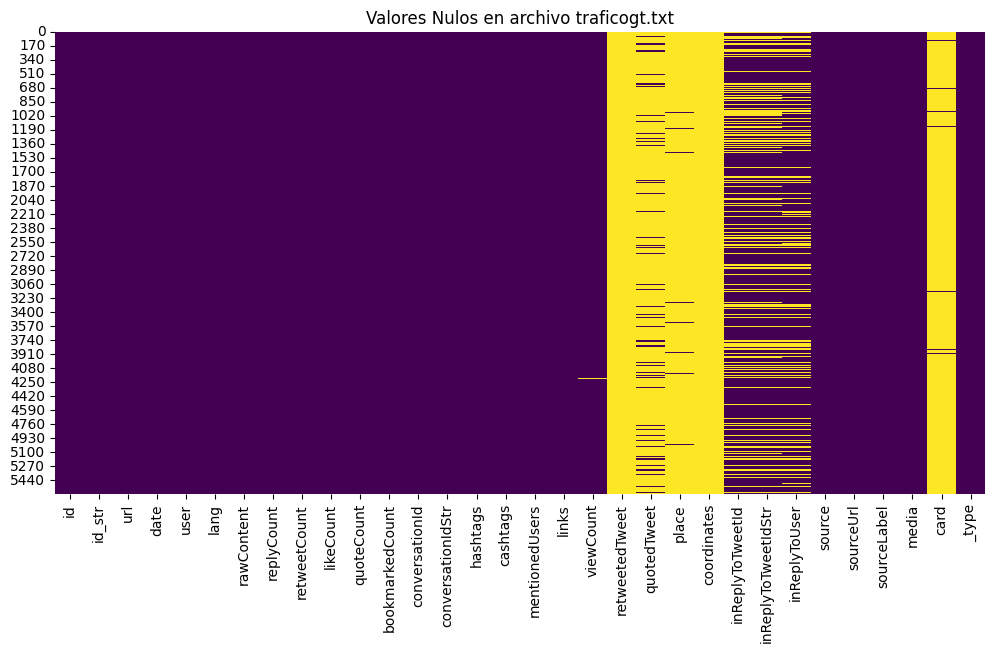

In [7]:
plot_null_values(traficogt_df, 'traficogt.txt')

#### Observaciones de nulos

**Variables con muchos nulos**

`retweetedTweet`, `quotedTweet`, `coordinates`, `place`, `media`, y `card` tienen una gran cantidad de valores nulos (**cercana al 100%**), lo que hace que su retenci√≥n en el an√°lisis sea poco pr√°ctica. Dado que el enfoque de este estudio es entender c√≥mo la temporada de lluvias afecta el tr√°fico en la ciudad, estas variables no ofrecen informaci√≥n relevante.
- `Retweets` no contienen contenido original y no reflejan nuevas observaciones sobre el tr√°fico.
- `quotedTweet` contiene toda la informaci√≥n del tweet al que se menciona, sin embargo esta variable no aporta de manera directa como interactuan los usuarios.
- Datos geogr√°ficos (`coordinates`, `place`) tienen un bajo porcentaje de datos completos, lo que impide realizar an√°lisis espaciales √∫tiles sobre las zonas m√°s congestionadas de la ciudad.
- Contenido multimedia y tarjetas (`media`, `card`) no aportan informaci√≥n directa que ayude a analizar el tr√°fico en la ciudad.

**Variables con algunos nulos**

Las columnas como `inReplyToTweetId`, `inReplyToUser` y contienen informaci√≥n importante sobre la interacci√≥n entre usuarios, por lo que no se eliminar√°n. Sin embargo, los valores nulos se reemplazar√°n por una etiqueta que indique que el tweet no aplica a estas categor√≠as, permitiendo el an√°lisis de respuestas y citas de manera m√°s precisa.

#### Manejo de Nulos

Como se menciono anteriormente hay variables con casi todos sus datos faltantes y que no aportan infomraci√≥n relevante en el an√°lisis por lo que ser√°n eliminadas:
- `retweetedTweet`
- `coordinates`
- `place`
- `media`
- `card`

In [8]:
# Eliminar las columnas con muchos nulos que no aportan al an√°lisis
columns_to_drop = ['retweetedTweet', 'coordinates', 'place', 'media', 'card', 'quotedTweet', 'sourceUrl', 'sourceLabel']
traficogt_df = traficogt_df.drop(columns=columns_to_drop)

In [9]:
# Reemplazar los valores nulos en las columnas seleccionadas con un string representativo
columns_with_nans = ['inReplyToTweetId', 'inReplyToUser', 'inReplyToTweetIdStr']
traficogt_df[columns_with_nans] = traficogt_df[columns_with_nans].fillna('no aplica')
# Convertir los valores num√©ricos en 'inReplyToTweetId' a enteros, manteniendo "No aplica"
traficogt_df['inReplyToTweetId'] = traficogt_df['inReplyToTweetId'].apply(lambda x: int(x) if isinstance(x, float) else x)

# Eliminar las filas con valores nulos en las columnas restantes
traficogt_df = traficogt_df.dropna()

In [10]:
# Contar los valores nulos en cada columna del DataFrame
null_counts = traficogt_df.isnull().sum()
print(null_counts)

id                     0
id_str                 0
url                    0
date                   0
user                   0
lang                   0
rawContent             0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
bookmarkedCount        0
conversationId         0
conversationIdStr      0
hashtags               0
cashtags               0
mentionedUsers         0
links                  0
viewCount              0
inReplyToTweetId       0
inReplyToTweetIdStr    0
inReplyToUser          0
source                 0
_type                  0
dtype: int64


### Datos Anidados (Variables diccionario o lista)

Dado que hay variables dentro del conjunto de datos que poseen estructuras como diccionarios o listas (listas de diccionarios) dentro de sus valores, es necesario manejarlos para poder obtener informaci√≥n relevante. La estrategia sera evaluar el contenido de los diccionarios y determinar que keys son relevantes en este analisis para conservarlas en variables separadas, para las listas se evaluara el contenido y se creara un string con los valores concatenados separados por comas, si fuese el caso de listas de diccionarios, en ellos tambien se hara la evaluacion de keys para conservar solo la mas importante y con ello crear el string concatenado.

#### Identificaci√≥n de datos anidados

In [11]:
def identify_columns_with_dicts_or_lists(df):
    dict_columns = []
    list_columns = []
    
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            dict_columns.append(col)
        elif df[col].apply(lambda x: isinstance(x, list)).any():
            list_columns.append(col)
    
    print(f"Columnas con diccionarios:")
    for col in dict_columns:
        print(f"  - {col}")
    print(f"\nColumnas con listas:")
    for col in list_columns:
        print(f"  - {col}")

    return dict_columns, list_columns

In [12]:
dict_columns, list_columns = identify_columns_with_dicts_or_lists(traficogt_df)

Columnas con diccionarios:
  - user
  - inReplyToUser

Columnas con listas:
  - hashtags
  - cashtags
  - mentionedUsers
  - links


#### An√°lisis de contenidos

Hay 2 columnas que poseen diccionarios, y 4 con listas, a continuaci√≥n se analizara el contenido de cada una de estas variables

In [13]:
# Mostrar las primeras filas de las columnas con diccionarios
traficogt_df[dict_columns].head()

user  \
0  {'id': 93938886, 'id_str': '93938886', 'url': ...   
1  {'id': 976875408, 'id_str': '976875408', 'url'...   
2  {'id': 1730828822029750272, 'id_str': '1730828...   
3  {'id': 1802661334355456000, 'id_str': '1802661...   
4  {'id': 1155617398675988481, 'id_str': '1155617...   

                                       inReplyToUser  
0                                          no aplica  
1                                          no aplica  
2  {'id': 130315077, 'id_str': '130315077', 'user...  
3  {'id': 1802661334355456000, 'id_str': '1802661...  
4  {'id': 1155617398675988481, 'id_str': '1155617...

In [14]:
# Buscar la primera instancia no vac√≠a de diccionario en la columna 'user'
non_empty_user = traficogt_df[traficogt_df['user'].apply(lambda x: isinstance(x, dict) and len(x) > 0)]['user']
if non_empty_user.shape[0] > 0:
    print("Contenido del primer diccionario en la columna 'user':")
    display(non_empty_user.iloc[0])
else:
    print("No se encontraron diccionarios NO VACIOS en la columna 'user'")

Contenido del primer diccionario en la columna 'user':


{'id': 93938886,
 'id_str': '93938886',
 'url': 'https://x.com/traficogt',
 'username': 'traficogt',
 'displayname': 'traficoGT',
 'rawDescription': 'Noticias de ciudad de Guatemala',
 'created': '2009-12-01 20:42:19+00:00',
 'followersCount': 314368,
 'friendsCount': 137,
 'statusesCount': 52385,
 'favouritesCount': 3471,
 'listedCount': 291,
 'mediaCount': 1292,
 'location': 'Guatemala',
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1782036597841530880/-tVuhOdK_normal.jpg',
 'profileBannerUrl': None,
 'protected': None,
 'verified': False,
 'blue': False,
 'blueType': None,
 'descriptionLinks': [],
 'pinnedIds': [],
 '_type': 'snscrape.modules.twitter.User'}

Dado que el an√°lisis se centra en el impacto del tr√°fico en la ciudad y las interacciones entre usuarios, no todos los atributos del diccionario `user` son relevantes.

El diccionario presenta una gran cantidad de datos relacionados al usuario de X que realiz√≥ el tweet.
Por lo tanto, es importante destacar que realmente de todos estos atributos el √∫nico que es relevante mantener es el `username`, pues el resto son datos que no aportan mucho valor para el an√°lisis de tweets o de relaciones.

In [15]:
# Mostrar todo el contenido de un registro de la variable 'inReplyToUser'
non_empty_reply = traficogt_df[traficogt_df['inReplyToUser'].apply(lambda x: isinstance(x, dict) and len(x) > 0)]['inReplyToUser']

if non_empty_reply.shape[0] > 0:
    print("Contenido de un registro de la variable 'inReplyToUser':")
    display(non_empty_reply.iloc[0])
else:
    print("No se encontraron diccionarios NO VACIOS en la columna 'inReplyToUser'")

Contenido de un registro de la variable 'inReplyToUser':


{'id': 130315077,
 'id_str': '130315077',
 'username': 'PNCdeGuatemala',
 'displayname': 'PNC de Guatemala',
 '_type': 'snscrape.modules.twitter.UserRef'}

Similar a la variable `user`, este diccionario muestra parte de los datos del usuario, por lo que el √∫nico dato relevante a mantener es  `username`.

In [16]:
# Mostrar las primeras filas de las columnas con listas
traficogt_df[list_columns].head()

hashtags cashtags                                     mentionedUsers  \
0       []       []                                                 []   
1       []       []  [{'id': 783345301256073216, 'id_str': '7833453...   
2       []       []  [{'id': 130315077, 'id_str': '130315077', 'use...   
3       []       []  [{'id': 372126670, 'id_str': '372126670', 'use...   
4       []       []  [{'id': 1687984068, 'id_str': '1687984068', 'u...   

                                               links  
0                                                 []  
1  [{'url': 'https://www.prensalibre.com/guatemal...  
2                                                 []  
3                                                 []  
4                                                 []

In [17]:
# Mostrar todo el contenido de un registro de la variable 'hashtags'
non_empty_hashtags = traficogt_df[traficogt_df['hashtags'].apply(lambda x: isinstance(x, list) and len(x) > 0)]['hashtags']

if non_empty_hashtags.shape[0] > 0:
    print("Contenido de un registro de la variable 'hashtags':")
    display(non_empty_hashtags.iloc[0])
else:
    print("No se encontraron listas NO VACIAS en la columna 'hashtags'")

Contenido de un registro de la variable 'hashtags':


['urgente', 'Desaparecido']

Esta lista puede ser de ayuda al evaluar el contenido de los tweets, ya que los hashtags se pueden perder al momento de limpiar el texto de los mismos, el contenido es una lista de strings que representan el hashtag por lo que simplemente se pueden concatenar en un √∫nico string y separarlos por comas.

In [18]:
# Mostrar todo el contenido de un registro de la variable 'cashtags'
non_empty_cashtags = traficogt_df[traficogt_df['cashtags'].apply(lambda x: isinstance(x, list) and len(x) > 0)]['cashtags']
if non_empty_cashtags.shape[0] > 0:
    print("Contenido de un registro de la variable 'cashtags':")
    display(non_empty_cashtags.iloc[0])
else:
    print("No se encontraron listas NO VACIAS en la columna 'cashtags'")

No se encontraron listas NO VACIAS en la columna 'cashtags'


Esta variable se eliminar√° ya que no hay ningun registro con una lista con contenido, por lo tanto no es relevante.

In [19]:
# Mostrar todo el contenido de un registro de la variable 'mentionedUsers'
non_empty_mentionedUsers = traficogt_df[traficogt_df['mentionedUsers'].apply(lambda x: isinstance(x, list) and len(x) > 0)]['mentionedUsers']
if non_empty_mentionedUsers.shape[0] > 0:
    print("Contenido de un registro de la variable 'mentionedUsers':")
    display(non_empty_mentionedUsers.iloc[0])
else:
    print("No se encontraron listas NO VACIAS en la columna 'mentionedUsers'")

Contenido de un registro de la variable 'mentionedUsers':


[{'id': 783345301256073216,
  'id_str': '783345301256073216',
  'username': 'CC_Guatemala',
  'displayname': 'CC Guatemala',
  '_type': 'snscrape.modules.twitter.UserRef'}]

Esta variable es un tanto compleja pues muestra que es una lista de diccionarios de usuarios, cada diccionario presenta una estructura similar a `inReplyToUser`.
Por lo tanto en este caso conservar solo el username de cada diccionario sera la mejor opcion para terminar con un √∫nico string con los nombres concatenados separados por comas.

In [20]:
# Mostrar todo el contenido de un registro de la variable 'links'
non_empty_links = traficogt_df[traficogt_df['links'].apply(lambda x: isinstance(x, list) and len(x) > 0)]['links']
if non_empty_links.shape[0] > 0:
    print("Contenido de un registro de la variable 'links':")
    display(non_empty_links.iloc[0])
else:
    print("No se encontraron listas NO VACIAS en la columna 'links'")

Contenido de un registro de la variable 'links':


[{'url': 'https://www.prensalibre.com/guatemala/justicia/la-corte-de-constitucionalidad-ordena-al-renap-que-le-extienda-dpi-a-la-familia-rusa-bitkov-condenados-por-uso-de-documentos-falsos-breaking/',
  'text': 'prensalibre.com/guatemala/just‚Ä¶',
  'tcourl': 'https://t.co/0J24ZCXJ2c'}]

Esta es otra variable que no aporta informaci√≥n relevante, pues contiene una lista de diccionarios, donde cada diccionario contiene datos relacionados a los enlaces colocados dentro del tweet.

#### Manejo de dato anidados

Los hallazgos de la secci√≥n anterior mostraron que de las variables relacionadas a usuarios vale la pena conservar unicamente el `username`.

Por otro lado las variables `links` y `cashtags` no tienen datos relevantes para este estudio por lo que ser√°n eliminadas.

Asimismo `hashtags` pasara a ser un √∫nico string con los valores de cada hashtag concatenado separado por comas siguiendo este formato **"hashtag1, hashtag2, ..., hashtagN"**

Finalmente `mentionedUsers` pasara de ser una lista de diccionarios a un √∫nico
string con los valores del username de cada user separado por comas siguiendo un formato similar al de `hashtags`: **"username1, username2, ..., usernameN"**

Para ambas transformaciones de listas, en caso sean vacios, se utilizar√° el string **"no aplica"**.

In [21]:
def extract_username(value):
    """
    Funci√≥n que extrae el nombre de usuario de un diccionario.

    Args:
        value (dict): El diccionario de entrada.

    Returns:
        str: El nombre de usuario extra√≠do del diccionario. 
                Si no se encuentra, retorna 'No aplica'.
    """
    if isinstance(value, dict):
        return value.get('username', 'no aplica')
    
    return 'no aplica'

In [22]:
def process_list_column(value):
    """
    Funci√≥n que procesa una lista de diccionarios y extrae el nombre de usuario de cada uno.

    Args:
        value (list): La lista de diccionarios de entrada.

    Returns:
        str: El nombre de usuario extra√≠do de cada diccionario, separados por comas. 
                Si no se encuentra, retorna 'No aplica'.
    """
    if isinstance(value, list):
        # Si la lista est√° vac√≠a, retornar 'No aplica'
        if len(value) == 0:
            return 'no aplica'
        
        # Si la lista contiene strings, concatenarlos
        if all(isinstance(i, str) for i in value):
            return ', '.join(value)
        
        # Si la lista contiene diccionarios, extraer el username
        elif all(isinstance(i, dict) for i in value):
            return ', '.join([i.get('username', 'No aplica') for i in value])
        
    return 'no aplica'

In [23]:
# Aplicar la funci√≥n extract_username a las columnas con diccionarios
traficogt_df['user_username'] = traficogt_df['user'].apply(extract_username)
traficogt_df['inReplyToUser_username'] = traficogt_df['inReplyToUser'].apply(extract_username)

In [24]:
# Aplicar la funci√≥n process_list_column a las columnas con listas
traficogt_df['hashtags_str'] = traficogt_df['hashtags'].apply(process_list_column)
traficogt_df['mentionedUsers_str'] = traficogt_df['mentionedUsers'].apply(process_list_column)

In [25]:
# Limpiar las columnas con diccionarios y listas originales 
# Eliminar las columnas originales 
traficogt_df = traficogt_df.drop(columns=dict_columns + list_columns)

# Renombrar las columnas procesadas para que tengan el mismo nombre que las originales
traficogt_df = traficogt_df.rename(columns={
    'user_username': 'user',
    'inReplyToUser_username': 'inReplyToUser',
    'hashtags_str': 'hashtags',
    'mentionedUsers_str': 'mentionedUsers'
})

# Mostrar las primeras filas del DataFrame procesado
traficogt_df[['user', 'inReplyToUser', 'hashtags', 'mentionedUsers']].head()

user   inReplyToUser   hashtags  \
0        traficogt       no aplica  no aplica   
1     monymmorales       no aplica  no aplica   
2  animaldgalaccia  PNCdeGuatemala  no aplica   
3   EstacionDobleA  EstacionDobleA  no aplica   
4       CubReserva      CubReserva  no aplica   

                                      mentionedUsers  
0                                          no aplica  
1                                       CC_Guatemala  
2  PNCdeGuatemala, mingobguate, FJimenezmingob, d...  
3  amilcarmontejo, AztecaNoticiaGT, BancadaSemill...  
4  soy_502, AztecaNoticiaGT, CONAPgt, DenunciaEMP...

Ahora las variables con datos anidados pasaron a ser strings mas faciles de procesar.

### Idiomas de Tweets

Anteriormente se encontr√≥ que la variable `lang`, que indica el idioma en el que est√° escrito el tweet, contiene al menos **24 valores √∫nicos**. Esto sugiere que varios tweets no est√°n escritos en espa√±ol, lo que podr√≠a afectar la coherencia del an√°lisis si el contenido en otros idiomas no es relevante o comprensible. Con el fin de garantizar la consistencia del an√°lisis y evitar posibles sesgos, se evaluaran los diferentes idiomas presentes y el contenido de los tweets correspondientes. Este an√°lisis permitir√° decidir si es conveniente eliminar los tweets en otros idiomas o, en su defecto, conservar aquellos que puedan aportar informaci√≥n valiosa, como los escritos en ingl√©s.

#### Identificaci√≥n de Idiomas

In [26]:
# Obtener los valores √∫nicos de la columna 'lang' y el conteo de filas por valor
lang_counts = traficogt_df['lang'].value_counts()
display(lang_counts)

lang
es     5066
qme     340
en       51
qam      40
pt       32
und      24
it        7
ca        6
in        5
tl        4
eu        3
qht       3
art       2
da        2
cs        2
lv        2
fr        2
et        2
lt        2
ht        2
de        1
tr        1
nl        1
qst       1
Name: count, dtype: int64

Los Idiomas √∫nicos encontrados en la columna `lang` son:
- es (espa√±ol)
- und (indefinido)
- en (ingl√©s)
- da (dan√©s)
- ca (catal√°n)
- cs (checo)
- it (italiano)
- lv (let√≥n)
- de (alem√°n)
- et (estonio)
- pt (portugu√©s)
- tl (tagalo)
- in (indonesio)
- ht (haitiano)
- lt (lituano)
- tr (turco)
- eu (euskera)
- fr (franc√©s)
- nl (neerland√©s)
- art (emojis)

**Idiomas sin definicion clara**
- qst
- qme
- qam
- qht
Puede ser que estos sean tipos que Twitter definiera, como un tipo de dato personalizado.

Es evidente que la mayoria de estos idiomas tienen pocos tweets relacionados, con excepcion de qme con 340.

#### An√°lsis de contenidos

In [27]:
# Obtener el primer tweet para cada idioma
first_tweets_by_lang = traficogt_df.groupby('lang')[['lang','rawContent']].apply(lambda x: x.iloc[0]).reset_index(drop=True)

# Mostrar los primeros tweets de cada idioma
pd.set_option('display.max_colwidth', None)
display(first_tweets_by_lang)
pd.reset_option('display.max_colwidth')

lang  \
0   art   
1    ca   
2    cs   
3    da   
4    de   
5    en   
6    es   
7    et   
8    eu   
9    fr   
10   ht   
11   in   
12   it   
13   lt   
14   lv   
15   nl   
16   pt   
17  qam   
18  qht   
19  qme   
20  qst   
21   tl   
22   tr   
23  und   

                                                                                                                                                                                                                                                                                                                                            rawContent  
0                                                                                                                                                                                                                                                                                                                                                    ü§°  
1                                                                                                                                                                                                                                                                       @traficogt @BArevalodeLeon LA JAZMIN DE LA VERG@ NO HA DE PODER DORMIRü´µü§°ü´µü§°ü´µü§°üòäüëç  
2                                                                                                                                                                                                                                                                                                                    @traficogt Netcetero............M  
3                                                                                                                                                                                                                                                                                            @Tito8829 @PrensaComunitar @traficogt Vuele ALV netcenter  
4                                                                                                                                                                                                                                                                                                                                @traficogt Fraaaaaude  
5                                                                                                                                                                                                                                                                                                                      @lahoragt @traficogt ‚ÄúPosibles‚Äù  
6                                                                                                                                                                                                                                                                                Es comprensible la resoluci√≥n... El ruso sabe de engrasar maquinaria.  
7                                                                                                                                                                                                                                                                                  @traficogt Ja ja ja ja ja ja Tremendo Idota https://t.co/29JB8nf7jY  
8                                                                                                                                                                                                                                                                                                                       @traficogt @AlvaroArzuE basura  
9                                                                                                                                                                                                                                                    

La variable `lang`, que indica el idioma en el que est√° escrito cada tweet, inicialmente mostr√≥ al menos **24 valores √∫nicos**, lo que sugiri√≥ la presencia de tweets en varios idiomas. Sin embargo, tras un an√°lisis detallado de los tweets, se descubri√≥ que muchos de ellos, aunque clasificados como otros idiomas, realmente est√°n escritos en espa√±ol o contienen elementos de jerga, menciones a otros usuarios, hashtags y emojis, lo que dificulta una correcta clasificaci√≥n por parte del algoritmo de detecci√≥n de idiomas de X.

Dado que la mayor√≠a de los tweets est√°n en espa√±ol o contienen suficiente contexto en espa√±ol (dejando a un lado los de SPAM), se decidi√≥ conservar todos los tweets, independientemente del valor en la columna `lang`. Esto asegura que no se pierda informaci√≥n valiosa para el an√°lisis del tr√°fico, y adem√°s minimiza el riesgo de eliminar datos relevantes por una detecci√≥n incorrecta del idioma.

### Selecci√≥n de Variables

En las etapas previas de este proceso, se realiz√≥ una limpieza exhaustiva del conjunto de datos original, que inicialmente conten√≠a numerosas columnas con datos incompletos o irrelevantes para el an√°lisis del tr√°fico. Se eliminaron aquellas columnas con grandes cantidades de valores nulos, as√≠ como las que no aportaban informaci√≥n valiosa para el contexto de estudio. Ahora, con un conjunto de datos m√°s depurado, el siguiente paso consiste en identificar y seleccionar las variables m√°s relevantes para el an√°lisis. El objetivo es enfocarse √∫nicamente en aquellas que proporcionen insights significativos sobre las interacciones de los usuarios, las menciones, el contenido de los tweets y la actividad relacionada con el tr√°fico en la ciudad.

#### Identificaci√≥n de Variables Restantes

In [28]:
get_DF_info(traficogt_df)


El DataFrame tiene 5601 filas (registros) y 22 columnas (variables)



Nombre Columna         Tipo de Dato  Valores Nulos (%)  \
0                    id                int64                0.0   
1                id_str                int64                0.0   
2                   url               object                0.0   
3                  date  datetime64[ns, UTC]                0.0   
4                  lang               object                0.0   
5            rawContent               object                0.0   
6            replyCount                int64                0.0   
7          retweetCount                int64                0.0   
8             likeCount                int64                0.0   
9            quoteCount                int64                0.0   
10      bookmarkedCount                int64                0.0   
11       conversationId                int64                0.0   
12    conversationIdStr                int64                0.0   
13            viewCount              float64                0.0   
14     inReplyToTweetId               object                0.0   
15  inReplyToTweetIdStr               object                0.0   
16               source               object                0.0   
17                _type               object                0.0   
18                 user               object                0.0   
19        inReplyToUser               object                0.0   
20             hashtags               object                0.0   
21       mentionedUsers               object                0.0   

    Valores √önicos  
0             5593  
1             5593  
2             5593  
3             5584  
4               24  
5             5585  
6              196  
7              349  
8              502  
9              122  
10              75  
11            3182  
12            3182  
13            1844  
14            2291  
15            2291  
16              18  
17               1  
18            2072  
19             683  
20             270  
21            1522

**Variables a conservar:**
- `id`: √ötil para identificar tweets √∫nicos.
- `date`: Importante para el an√°lisis temporal.
- `rawContent`: Texto del tweet, esencial para el an√°lisis de contenido.
- `user`: Importante para an√°lisis de interacciones y usuarios, con esto asociamos el tweet a un usuario.
- `hashtags`, `mentionedUsers`: Informaci√≥n clave para el an√°lisis de redes, con esto se puede evaluar el contexto y a quienes se esta mencionando.
- `inReplyToTweetId`, `inReplyToUser`: Importante para el an√°lisis de redes e interacciones entre usuarios con esto se pueden evaluar mejor las interacciones, pues con el tweet se puede asociar a un usuario si es que existe.

El resto de variables ser√°n eliminadas debido a que no tienen relevancia para este an√°lisis.

In [29]:
columns_to_keep = ['id', 'user','rawContent', 'date', 'hashtags', 'mentionedUsers', 'inReplyToUser', 'inReplyToTweetId']
traficogt_df = traficogt_df[columns_to_keep]
traficogt_df.head()

id             user  \
0  1834236045598056867        traficogt   
1  1834029142565658846     monymmorales   
2  1834039491826180424  animaldgalaccia   
3  1833963729136091179   EstacionDobleA   
4  1833665391698092330       CubReserva   

                                          rawContent  \
0  Es comprensible la resoluci√≥n... El ruso sabe ...   
1  La corrupci√≥n de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                       date   hashtags  \
0 2024-09-12 14:22:06+00:00  no aplica   
1 2024-09-12 00:39:56+00:00  no aplica   
2 2024-09-12 01:21:04+00:00  no aplica   
3 2024-09-11 20:20:01+00:00  no aplica   
4 2024-09-11 00:34:31+00:00  no aplica   

                                      mentionedUsers   inReplyToUser  \
0                                          no aplica       no aplica   
1                                       CC_Guatemala       no aplica   
2  PNCdeGuatemala, mingobguate, FJimenezmingob, d...  PNCdeGuatemala   
3  amilcarmontejo, AztecaNoticiaGT, BancadaSemill...  EstacionDobleA   
4  soy_502, AztecaNoticiaGT, CONAPgt, DenunciaEMP...      CubReserva   

      inReplyToTweetId  
0            no aplica  
1            no aplica  
2            no aplica  
3  1833963727575781632  
4  1833664431084949760

Ahora el Dataframe solo contiene las variables mas relevantes para este estudio, disminuyendo la dimensionalidad del Dataframe considerablemente.